<h1><center> Plot simulation results: data03

<h4> Output file directory: `JuliaSEM/output/flux_sims/data__.out`

Plotting scripts: `JuliaSEM/scripts/plots.jl`, `JuliaSEM/scripts/earthquake-cycles.jl`

<h4> Simulation Description: </h4>
  

###### data03.out: 

    - Elastic halfspace 
    - Fault zone depth = 8km 
    - Fault zone half width = 0.5km.
    - Dc = 8 mm
    - maximum timestep = 180 days
    - UMich Flux: Compute time = 104 hrs, CPU time = 784 hrs 
    - cluster parameters: nodes=1:ppn=8, pmem=8gb
    
###### data05.out: 

    - Elastic halfspace 
    - Fault zone depth = 12km 
    - Fault zone half width = 0.5km.
    - Dc = 8 mm
    - maximum timestep = 180 days
    - UMich Flux: Compute time = 99 hrs 
    - cluster parameters: nodes=1:ppn=4, pmem=8gb

In [1]:
include("output.jl")
# for now, construct results, parameters, setup

mutable struct results
    Stress::Array{Float64,2}
    SlipVel::Array{Float64,2}
    Slip::Array{Float64,2}
    time_::Array{Float64}
end

using Distributed
include("src/parameters/defaultParameters.jl")
include("src/setup.jl")

P = setParameters(8e3)
S = setup(P);

In [2]:
# deserialize the output
using Serialization
open("output/flux_sims/data03.out") do f
    global O, sim_time
    O = deserialize(f)
    sim_time = deserialize(f)
end

375157.454441196

In [1]:
include("output.jl");

<h3> Plot results

In [3]:
# Cumulative-slip plot
include("scripts/cumulative-slip.jl")
include("scripts/plots.jl")

cumSlipPlot (generic function with 1 method)

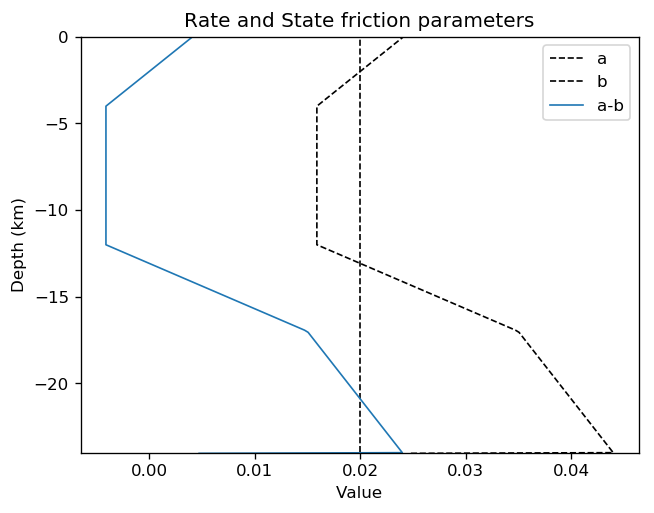

In [8]:
fricPlot(S.cca, S.ccb, S.FltX);

250.0

In [6]:
delfsec, delf5yr = cumSlip(O.Slip, O.SlipVel, O.time_)
cumSlipPlot(delfsec, delf5yr, S.FltX)

PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= /Users/prith/.julia/packages/PyCall/rUul9/src/pyfncall.jl:44 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'ValueError'>
ValueError('x and y must have same first dimension, but have shapes (721, 250) and (481,)',)
  File "/Users/prith/.julia/packages/Conda/m7vem/deps/usr/lib/python3.6/site-packages/matplotlib/__init__.py", line 1867, in inner
    return func(ax, *args, **kwargs)
  File "/Users/prith/.julia/packages/Conda/m7vem/deps/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py", line 1528, in plot
    for line in self._get_lines(*args, **kwargs):
  File "/Users/prith/.julia/packages/Conda/m7vem/deps/usr/lib/python3.6/site-packages/matplotlib/axes/_base.py", line 406, in _grab_next_args
    for seg in self._plot_args(this, kwargs):
  File "/Users/prith/.julia/packages/Conda/m7vem/deps/usr/lib/python3.6/site-packages/matplotlib/axes/_base.py", line 383, in _plot_args
    x, y = self._xy_from_xy(x, y)
  File "/Users/prith/.julia/packages/Conda/m7vem/deps/usr/lib/python3.6/site-packages/matplotlib/axes/_base.py", line 242, in _xy_from_xy
    "have shapes {} and {}".format(x.shape, y.shape))


# MFD plot
include("scripts/earthquake-cycles.jl")

Mw = moment_magnitude(P, S, O.Slip, O.SlipVel, O.time_)

MwPlot(Mw)

<h3> Rough Work

delfafter, tStart, tEnd, vhypo, hypo = Coslip(S, O.Slip, O.SlipVel, O.time_);

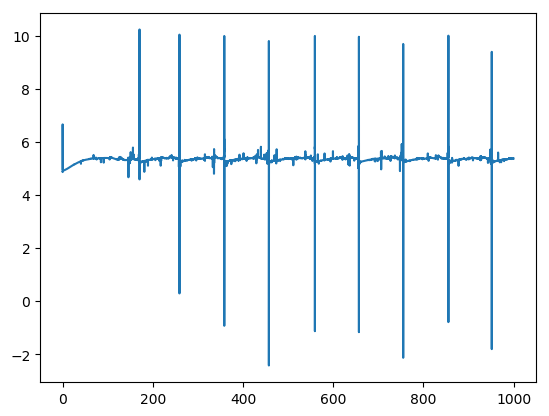

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x15fe5eba8>

In [35]:
PyPlot.plot(O.time_/P.yr2sec, O.Stress[120,:])

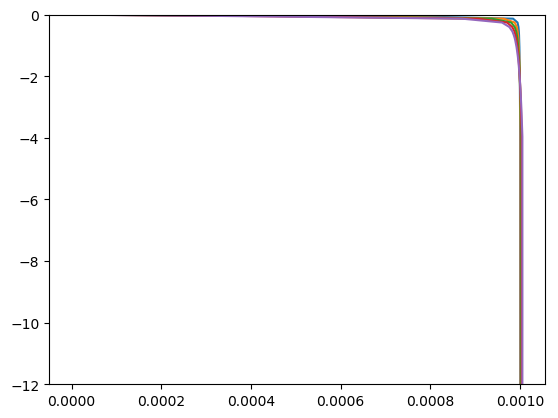

In [27]:
# 39 to 83: one event
PyPlot.plot(O.SlipVel[:,1:5], S.FltX./1e3)
ylim([-12, 0])
show()

721-element Array{Float64,1}:
 -48000.0              
 -47953.95382276106    
 -47866.666666666664   
 -47779.37951057227    
 -47733.333333333336   
 -47687.2871560944     
 -47600.0              
 -47512.7128439056     
 -47466.666666666664   
 -47420.62048942773    
 -47333.333333333336   
 -47246.04617723894    
 -47200.0              
      ⋮                
   -753.953822761061   
   -666.6666666666642  
   -579.3795105722675  
   -533.3333333333285  
   -487.2871560943895  
   -399.9999999999927  
   -312.71284390559595 
   -266.66666666666424 
   -220.62048942772526 
   -133.33333333332848 
    -46.046177238931705
      0.0              

In [29]:
S.M[S.iFlt]

121-element Array{Float64,1}:
 3.1580010549163703e7
 8.721999999999999e7 
 1.1392e8            
 8.721999999999999e7 
 3.2040000000000007e7
 8.721999999999999e7 
 1.1392e8            
 8.721999999999999e7 
 3.2040000000000007e7
 8.721999999999999e7 
 1.1392e8            
 8.721999999999999e7 
 3.2040000000000007e7
 ⋮                   
 8.721999999999999e7 
 1.1392e8            
 8.721999999999999e7 
 3.2040000000000007e7
 8.721999999999999e7 
 1.1392e8            
 8.721999999999999e7 
 3.2040000000000007e7
 8.721999999999999e7 
 1.1392e8            
 8.721999999999999e7 
 3.1580010549163703e7

In [260]:
hist = fit(Histogram, hypo./1e3, nbins = 20)

Histogram{Int64,1,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  -12.0:1.0:0.0
weights: [1, 0, 0, 1, 20, 19, 12, 4, 6, 0, 0, 29]
closed: left
isdensity: false

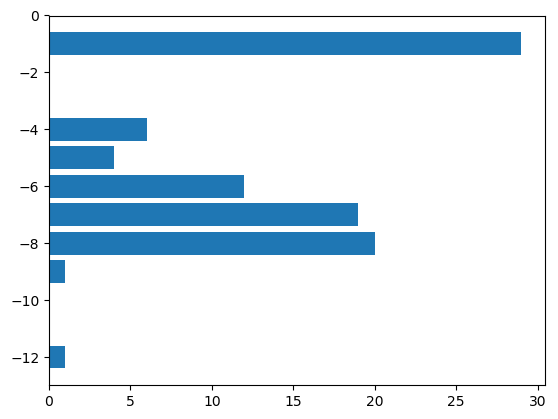

In [261]:
fig = PyPlot.figure()
ax = fig[:add_subplot](111)
ax[:barh](hist.edges[1][1:end-1], hist.weights)
show()

In [264]:
hist.weights

12-element Array{Int64,1}:
  1
  0
  0
  1
 20
 19
 12
  4
  6
  0
  0
 29

In [266]:
hypo

92-element Array{Float64,1}:
 -7866.666666666664  
  -312.71284390559595
  -312.71284390559595
  -312.71284390559595
  -487.2871560943895 
  -312.71284390559595
  -312.71284390559595
  -312.71284390559595
  -312.71284390559595
  -312.71284390559595
  -312.71284390559595
  -312.71284390559595
  -312.71284390559595
     ⋮               
 -6446.046177238932  
 -6353.953822761061  
 -6712.712843905596  
 -6712.712843905596  
 -6712.712843905596  
 -6712.712843905596  
 -6712.712843905596  
 -6266.666666666664  
 -6179.3795105722675 
 -6087.2871560943895 
 -6446.046177238932  
 -7333.3333333333285 